## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import label
import statistics

## Pathes

In [5]:
img_path = "data/01/1/1.png"

## Global Variables

# Preprocessing Module

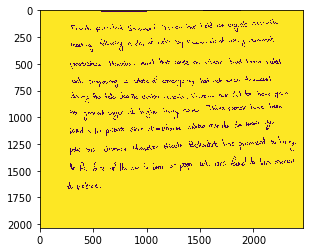

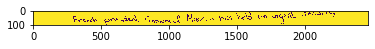

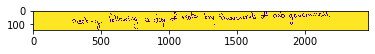

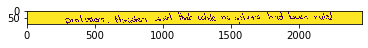

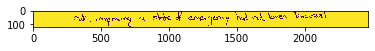

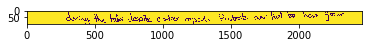

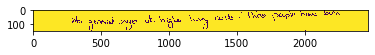

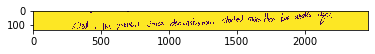

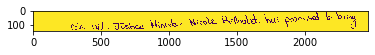

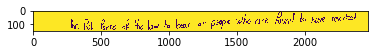

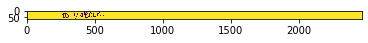

In [13]:

def crop_handwritten_region(imgpath):
    
    img = cv2.imread(imgpath)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret3,bin_img = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    width_threshold = 1000
    height_threshold = 500

    width_array =[]
    y_array =[]
    # Detect the main horizontal black separator lines of the IAM handwriting forms.
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        
        if w > width_threshold:
            if h <height_threshold:
                width_array.append (w) 
                y_array.append(y)
                
                
    indixes = sorted(range(len(width_array)), key=lambda k: width_array[k])
    indixes.reverse()
    three_lines_y=[]
    three_lines_y.append(y_array[0])
    three_lines_y.append(y_array[1])
    three_lines_y.append(y_array[2])
    three_lines_y.sort()

    newCooriate_y1= three_lines_y[1]
    newCooriate_y2= three_lines_y[2]

    cropped_image = bin_img[newCooriate_y1+4:newCooriate_y2 , :]
    
    return cropped_image

def split_lines(img):
    
    # array contains summation of black pixels on each row of the image
    sum_black_in_row = np.sum(img < 255, axis=1)
    # threshold for rows contains black pixel > 15 
    intial_lines = sum_black_in_row > 15
    lines = []
    i = 0

    while i < len(intial_lines):
        if intial_lines[i] == True:
            begin_row = i
            if begin_row - 6 < 0:
                up = 0
            else:
                up = begin_row - 6
            while i < len(intial_lines) and intial_lines[i]:
                i += 1
            if i+5 > len(intial_lines) - 1 :
                down=len(intial_lines) - 1
            else:
                 down = i + 6
            if i - begin_row > 20:  # threshold for # of rows to be higher than 20 row 
                lines.append(img[up:down, :])
        i += 1
    return lines

if __name__ == '__main__':
    imgpath =img_path
    cropped_img = crop_handwritten_region(imgpath)
    imgplot = plt.imshow(cropped_img)
    plt.show()

    for i in split_lines(cropped_img):
        imgplot = plt.imshow(i)
        plt.show()

# Feature Extraction Module

In [ ]:
# h is theheight of the three main writing zones
# w is the width of the characters
# s is slant of writing
#
# the main features are determined by the height of three main writing zones
# topline, upper baseline, lower baseline, and bottomline
#
# to get these lines, 

## Local Binary Pattern (LBP)

In [66]:
# it is a texture-based approach in the feature extraction process

# calculate local binary pattern functions

# change this later to be R = 3 instead of R = 1
def lbp_calculate_pixels(img, x, y):
    threshold = img[x, y]
    bin_val = []
    bin_val.append(img[x - 1, y] >= threshold)
    bin_val.append(img[x - 1, y + 1] >= threshold)
    bin_val.append(img[x, y + 1] >= threshold)
    bin_val.append(img[x + 1, y + 1] >= threshold)
    bin_val.append(img[x + 1, y] >= threshold)
    bin_val.append(img[x + 1, y - 1] >= threshold)
    bin_val.append(img[x, y - 1] >= threshold)
    bin_val.append(img[x - 1, y - 1] >= threshold)
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    
    decimal = 0
    
    for i in range(len(power_val)):
        decimal += bin_val[i] * power_val[i]
    
    return decimal

def lbp_get_result(img):
    height, width = img.shape
    result = np.zeros((height, width), np.uint8)
    for i in range(1, height-1):
        for j in range(1, width-1):
            result[i, j] = lbp_calculate_pixels(img, i, j)
    return result

# get the histogram of the resulted lbp img as our featured vector
def lbp_hist(img_lbp):
    img_reshaped = img_lbp.reshape(-1, 1)
    result_hist = np.histogram(img_reshaped)
    return result_hist

def lbp_normalize(lbp_hist):
    lbp_mean = statistics.mean(lbp_hist)
    lbp_hist = lbp_hist / lbp_mean
    return lbp_hist

# if __name__ == '__main__':
#     feature_vec = []
#     for i in split_lines(cropped_img):
#         it = cv2.imread(imgpath)
# #         Camera.set(cv::CAP_PROP_FORMAT, CV_8UC1)
#         img_gray = cv2.cvtColor(it, cv2.COLOR_BGR2GRAY)
#         lbp_img = lbp_get_result(img_gray)
#         result_hist = lbp_hist(lbp_img)
        
#         result_normalized = lbp_normalize(result_hist)
#         feature_vec.append(result_normalized)
    
#     print(feature_vec)

In [50]:
# b = cropped_img[0]
b = it
# print(type(b))
# print(b)
# print(b.shape)
bb = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
# bp = lbp_get_result(bb)
# rh = lbp_hist(bp)
# rn = lbp_normalize(rh)


# c = b.reshape(-1, 1)
# r = np.histogram(c)
# # d = r.tolist()
# d = list(r)
# print(d)
# print(it.shape)
# print(c.shape)
# for i in d:
#     print(type(i), i)
# r /= statistics.mean(d)

In [51]:
bp = lbp_get_result(bb)

In [52]:
rh = lbp_hist(bp)

In [60]:
print(rh)
print(type(rh))
print(np.ndim(rh))

lrh = list(rh)
print(lrh)
print(type(lrh))
print(np.ndim(lrh))

print(lrh[0])

# rn = lbp_normalize(rh)

(array([ 197643,  175607,  130934,   28644,  205209,   84003,   35883,
        177456,  122768, 7239165], dtype=int64), array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ]))
<class 'tuple'>
1
[array([ 197643,  175607,  130934,   28644,  205209,   84003,   35883,
        177456,  122768, 7239165], dtype=int64), array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ])]
<class 'list'>
1
[ 197643  175607  130934   28644  205209   84003   35883  177456  122768
 7239165]


In [64]:
def gettemp(x):
    y = statistics.mean(x)
    x = x / y
    return x

rn0 = gettemp(lrh[0])
rn1 = gettemp(rh[1])

In [65]:
print(rn0)
print(rn1)

[0.23536466 0.20912292 0.15592374 0.03411092 0.24437469 0.10003561
 0.04273154 0.21132482 0.1461992  8.62081428]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


AxesImage(54,36;334.8x217.44)
<class 'numpy.ndarray'>
[255 255 255 ... 255 255 255]
(2464,)


error: OpenCV(4.1.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


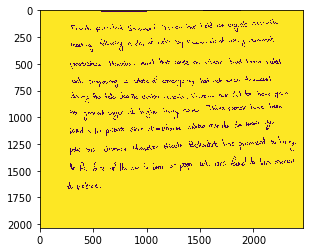

In [68]:
b = cropped_img[0]
imgplot = plt.imshow(cropped_img)
print(imgplot)
# b = it
print(type(b))
print(b)
print(b.shape)
bb = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
# bp = lbp_get_result(bb)
# rh = lbp_hist(bp)
# rn = lbp_normalize(rh)